In [1]:
import os
import bayesflow as bf
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
from src.AmortizedMixture import *
from src.helpers import *
from src.models.NormalMixture import *

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


## This file is outdated, see case studies

In [2]:
N_OBS=200
N_CLS=2

## Stan

In [ ]:
stan_model = CmdStanModel(stan_file=os.path.join('stan', 'normal-mixture.stan'))
stan_data = {
    "n_obs": N_OBS,
    "n_cls": N_CLS,
    "y": np.sort(np.random.normal([-1 if i < 0.25 else 1 for i in np.random.uniform(low=0, high=1, size=N_OBS)])),
    "prior_scale": 1.0,
    "alpha": [1, 1]
}
stan_fit = stan_model.sample(stan_data, adapt_delta=0.95)

In [4]:
print(stan_fit.diagnose())

DEBUG:cmdstanpy:cmd: /Users/simonkucharsky/.cmdstan/cmdstan-2.34.1/bin/diagnose /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/normal-mixturen6djy_l_/normal-mixture-20240417172152_1.csv /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/normal-mixturen6djy_l_/normal-mixture-20240417172152_2.csv /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/normal-mixturen6djy_l_/normal-mixture-20240417172152_3.csv /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/normal-mixturen6djy_l_/normal-mixture-20240417172152_4.csv
cwd: None


Processing csv files: /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/normal-mixturen6djy_l_/normal-mixture-20240417172152_1.csv, /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/normal-mixturen6djy_l_/normal-mixture-20240417172152_2.csv, /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/normal-mixturen6djy_l_/normal-mixture-20240417172152_3.csv, /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/normal-mixturen6djy_l_/normal-mixture-20240417172152_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [5]:
stan_fit.summary()

DEBUG:cmdstanpy:cmd: /Users/simonkucharsky/.cmdstan/cmdstan-2.34.1/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/stansummary-normal-mixture-yg9xkq_j.csv /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/normal-mixturen6djy_l_/normal-mixture-20240417172152_1.csv /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/normal-mixturen6djy_l_/normal-mixture-20240417172152_2.csv /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/normal-mixturen6djy_l_/normal-mixture-20240417172152_3.csv /var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/tmp5nux43d9/normal-mixturen6djy_l_/normal-mixture-20240417172152_4.csv
cwd: None


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-329.605000,0.035685,1.294080,-332.131000,-329.257000,-328.236000,1315.08,361.286,1.00040
p[1],0.357456,0.002686,0.106791,0.198550,0.350489,0.543318,1580.27,434.139,1.00086
p[2],0.642544,0.002686,0.106791,0.456671,0.649665,0.801067,1580.27,434.139,1.00086
mu[1],-0.330309,0.007199,0.251872,-0.746195,-0.322436,0.076897,1224.15,336.304,1.00166
mu[2],1.251340,0.003575,0.168248,0.988346,1.242860,1.544410,2215.24,608.582,1.00013
...,...,...,...,...,...,...,...,...,...
"class_membership[198,2]",0.985149,0.000521,0.019038,0.951313,0.991014,0.998544,1337.82,367.534,1.00159
"class_membership[199,1]",0.012983,0.000467,0.017138,0.001218,0.007725,0.043146,1344.85,369.464,1.00164
"class_membership[199,2]",0.987017,0.000467,0.017138,0.956822,0.992279,0.998782,1344.85,369.463,1.00164
"class_membership[200,1]",0.012048,0.000440,0.016162,0.001097,0.007102,0.040186,1349.02,370.609,1.00167


## Generative Model

In [3]:
def prior_fun(num_states=N_CLS):
    return {
        'class_probabilities': np.random.dirichlet([1 for _ in range(num_states)]),
        'class_parameters': np.sort(np.random.normal(size=num_states, scale=2))
    }

prior = bf.simulation.Prior(prior_fun = prior_fun)

In [4]:
def simulator_fun(params, num_obs=N_OBS, num_states=N_CLS):
    pi, mu = params.values()
    z = np.random.choice(a = [i for i in range(num_states)], size = num_obs, replace = True, p=pi)
    loc = mu[z]
    y = np.random.normal(loc=loc, size=(num_obs))
    return {
        "latents": z,
        "observables": y
    }
simulator = bf.simulation.Simulator(simulator_fun=simulator_fun)

In [5]:
model = bf.simulation.GenerativeModel(prior=prior, simulator=simulator)

INFO:root:Performing 2 pilot runs with the anonymous model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, )
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, )
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.


In [6]:
def configurator(input_dict, n_cls):
    parameters = np.array([np.concatenate([a['class_parameters'], a['class_probabilities']]) for a in input_dict['prior_draws']]).astype(np.float32)
    
    latents = [a['latents'] for a in input_dict['sim_data']]
    latents = tf.one_hot(np.array(latents), n_cls)

    observables = np.array([a['observables'] for a in input_dict['sim_data']])[..., np.newaxis, np.newaxis]

    return {
        "parameters": parameters,
        "latents": latents,
        "observables": observables
    }

In [7]:
%%time
d = configurator(model(1000), N_CLS)

CPU times: user 42.6 ms, sys: 5.43 ms, total: 48 ms
Wall time: 45.5 ms


In [8]:
model2 = NormalMixture(n_cls=N_CLS)

In [10]:
%%time
d=model2(1000)

CPU times: user 50.6 ms, sys: 4.04 ms, total: 54.7 ms
Wall time: 54 ms


## Amortized mixture

Estimating $p(s | y)$

In [11]:
NUM_STATES=2

amortizer = AmortizedMixture(
    inference_net=OldIndependentClassificator(num_outputs=NUM_STATES),
    local_summary_net  = bf.networks.DeepSet(summary_dim=1),
    global_summary_net = bf.networks.DeepSet(summary_dim=10)
)
newAmortizer = AmortizedMixture(
    inference_net=IndependentClassificator(num_outputs=NUM_STATES),
    local_summary_net  = bf.networks.DeepSet(summary_dim=1),
    global_summary_net = bf.networks.DeepSet(summary_dim=10)
)

In [12]:
def configurator(input_dict):
    parameters = np.array([np.concatenate([a['class_parameters'], a['class_probabilities']]) for a in input_dict['prior_draws']]).astype(np.float32)
    
    latents = [a['latents'] for a in input_dict['sim_data']]
    latents = tf.one_hot(np.array(latents), NUM_STATES)

    observables = np.array([a['observables'] for a in input_dict['sim_data']])[..., np.newaxis, np.newaxis]

    return {
        "parameters": parameters,
        "latents": latents,
        "summary_conditions": observables
    }

In [13]:
%%time
df = model(64)
df_conf = configurator(df)

CPU times: user 3.14 ms, sys: 1.73 ms, total: 4.87 ms
Wall time: 3.79 ms


In [14]:
%%time
amortizer.compute_loss(df_conf)

CPU times: user 437 ms, sys: 98.3 ms, total: 536 ms
Wall time: 421 ms


<tf.Tensor: shape=(), dtype=float32, numpy=68.614265>

In [15]:
%%time
newAmortizer.compute_loss(df_conf)

CPU times: user 367 ms, sys: 84.1 ms, total: 451 ms
Wall time: 328 ms


<tf.Tensor: shape=(), dtype=float32, numpy=68.60752>

In [18]:
trainer = bf.trainers.Trainer(amortizer=newAmortizer, generative_model=model, configurator=configurator)

INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [19]:
%%time
h = trainer.train_online(epochs=20, iterations_per_epoch=500, batch_size=64)

Training epoch 1:  16%|█▌        | 80/500 [00:07<00:41, 10.20it/s, Epoch: 1, Iter: 80,Loss: 49.805,Avg.Loss: 58.689,LR: 5.00E-04]


KeyboardInterrupt: 

In [26]:
newModel = NormalMixture(n_obs=[50, 500], n_cls=2, n_rep=[1,20])

newModel(2)

{'parameters': array([[ 0.36331227,  0.6366877 , -1.3977858 , -0.9984577 ],
        [ 0.9266867 ,  0.0733133 , -1.1623904 ,  0.7163662 ]],
       dtype=float32),
 'latents': array([[[0., 1.],
         [0., 1.],
         [0., 1.],
         ...,
         [0., 1.],
         [1., 0.],
         [0., 1.]],
 
        [[1., 0.],
         [0., 1.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]]], dtype=float32),
 'summary_conditions': array([[[[-1.104219  ],
          [-0.89176965],
          [ 0.16067488],
          ...,
          [-1.5130782 ],
          [-0.54135495],
          [-1.6905323 ]],
 
         [[-2.6485512 ],
          [-2.0122564 ],
          [-0.9587337 ],
          ...,
          [ 0.07480172],
          [-1.7077255 ],
          [-0.45082673]],
 
         [[ 0.13420834],
          [-0.82586086],
          [ 0.28408968],
          ...,
          [-0.7238411 ],
          [-1.7331446 ],
          [ 0.28492987]],
 
         ...,
 
        

In [27]:
def conf(x):
    out = x
    out['direct_conditions'] = None
    return out 

In [30]:
trainer = bf.trainers.Trainer(amortizer=newAmortizer, generative_model=newModel, configurator=conf)

INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [31]:
%%time
h = trainer.train_online(epochs=20, iterations_per_epoch=500, batch_size=64)

Training epoch 1:  10%|█         | 50/500 [00:18<02:44,  2.73it/s, Epoch: 1, Iter: 50,Loss: 87.609,Avg.Loss: 73.479,LR: 5.00E-04] 


KeyboardInterrupt: 

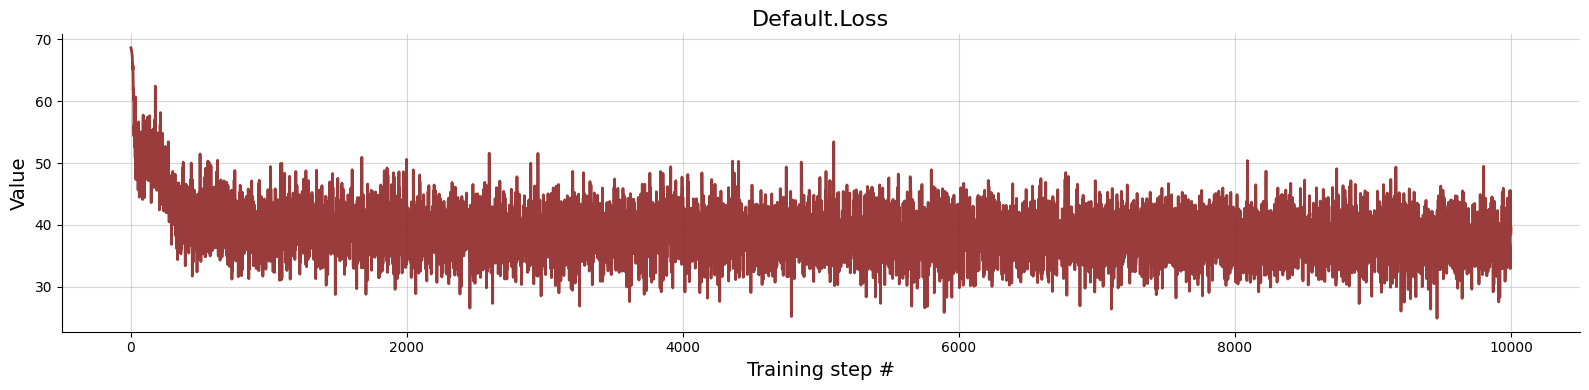

In [13]:
f=bf.diagnostics.plot_losses(h)

In [14]:
bf_data = {
    "observables": np.array([stan_data['y']])[..., np.newaxis, np.newaxis]
}
class_membership_mixture = np.array(amortizer(bf_data))

## Amortized mixture posterior

Estimating $p(s, \theta \mid y) = p(s \mid \theta, y) \cdot p(\theta \mid y)$

In [15]:
mixture_net = IndependentClassificator(num_outputs=2)
posterior_net = bf.networks.InvertibleNetwork(num_params=NUM_STATES*2)

local_summary_net = bf.networks.DeepSet(summary_dim=1)
global_summary_net = bf.networks.DeepSet(summary_dim=NUM_STATES*2*2)

amortized_mixture = AmortizedMixture(
    inference_net=mixture_net,
    local_summary_net=local_summary_net
)
amortized_posterior = bf.amortizers.AmortizedPosterior(
    inference_net=posterior_net, 
    summary_net=bf.networks.HierarchicalNetwork([local_summary_net, global_summary_net])
)

amortized_mixture_posterior = AmortizedMixturePosterior(
    amortized_mixture=amortized_mixture, 
    amortized_posterior=amortized_posterior
)

In [16]:
def configurator_mixture_posterior(input_dict):
    mixture_inputs = configurator(input_dict)
    posterior_inputs = {
        'parameters': mixture_inputs['parameters'],
        'summary_conditions': mixture_inputs['observables']
    }

    return {
        'mixture_inputs': mixture_inputs,
        'posterior_inputs': posterior_inputs
    }

In [17]:
trainer = bf.trainers.Trainer(amortizer=amortized_mixture_posterior, generative_model=model, configurator=configurator_mixture_posterior)

INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [18]:
%%time
h = trainer.train_online(epochs=50, iterations_per_epoch=1000, batch_size=64)

Training epoch 50: 100%|██████████| 1000/1000 [01:39<00:00, 10.07it/s, Epoch: 50, Iter: 1000,Mix.Loss: 24.709,Post.Loss: -7.578,W.Decay: 0.141,Avg.Mix.Loss: 26.488,Avg.Post.Loss: -7.868,Avg.W.Decay: 0.141,LR: 0.00E+00]

CPU times: user 4h 42min 53s, sys: 2h 16min 9s, total: 6h 59min 3s
Wall time: 1h 22min 34s


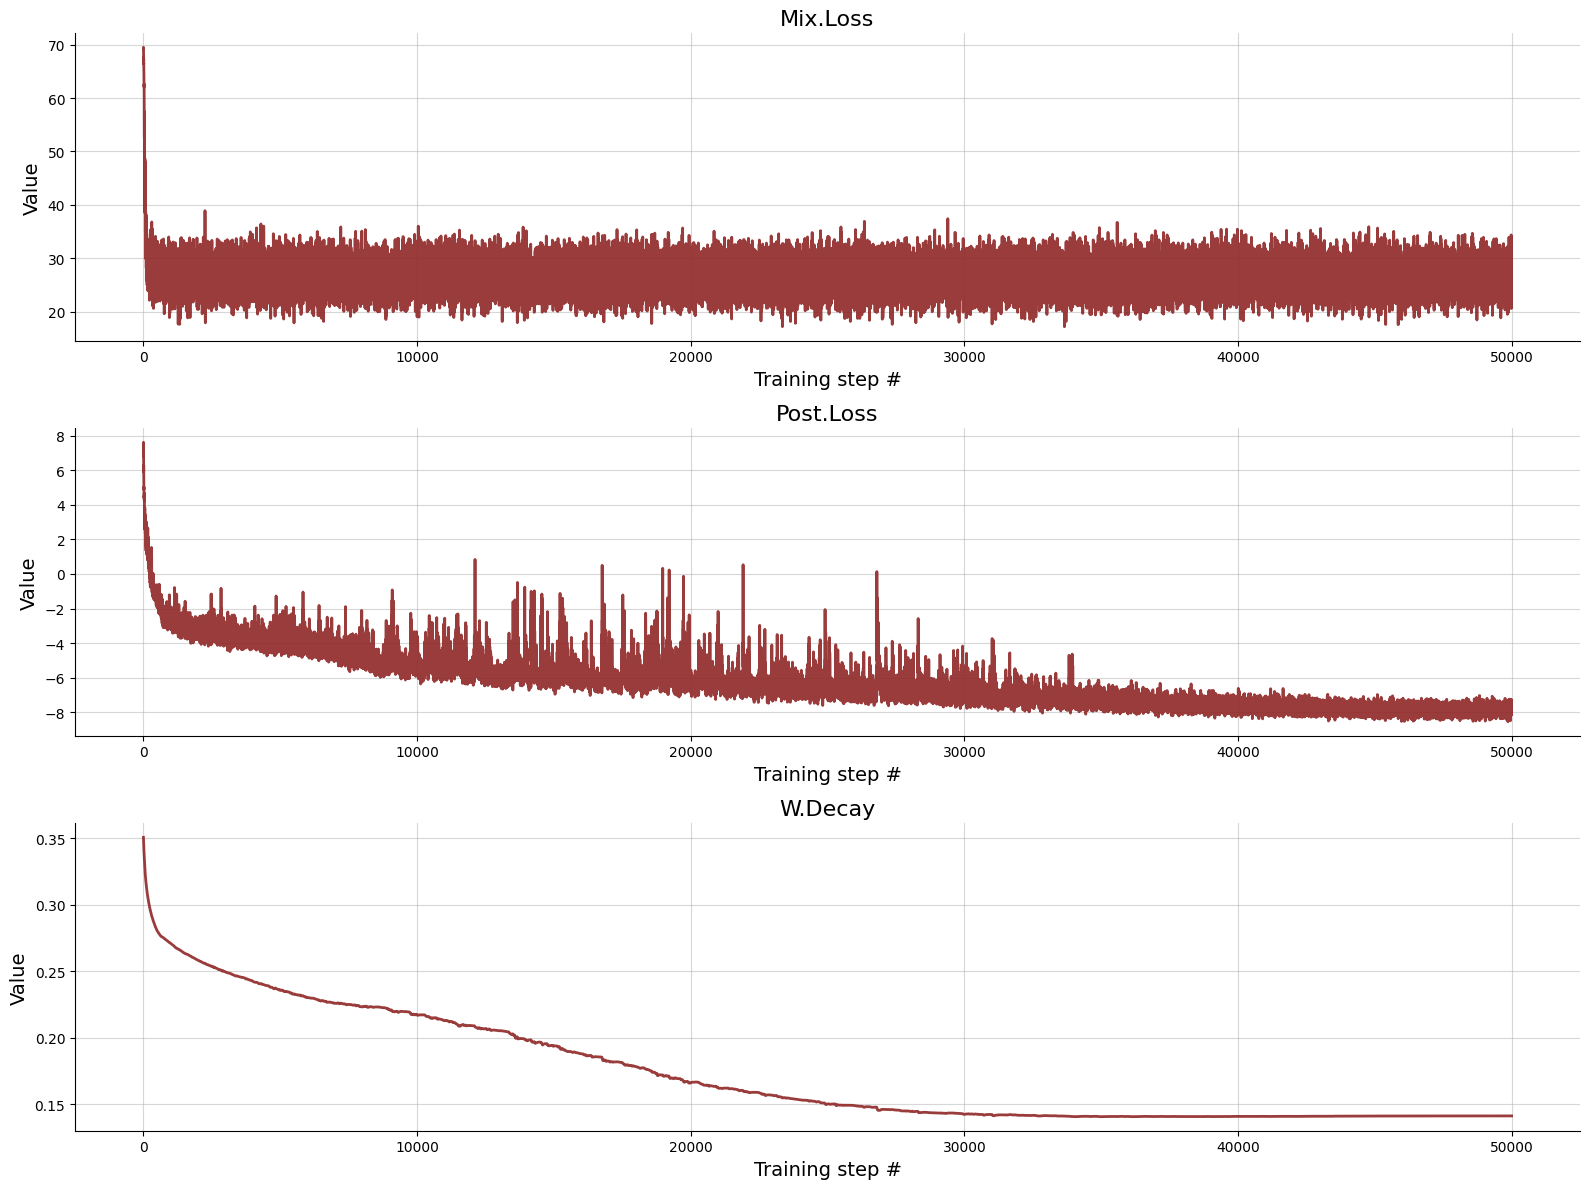

In [19]:
f=bf.diagnostics.plot_losses(h)

In [28]:
bf_data2 = {
    "posterior_inputs": {"summary_conditions": bf_data['observables']},
    "mixture_inputs": bf_data
}
parameter_estimates_mixture_posterior, class_membership_mixture_posterior = amortized_mixture_posterior.sample(bf_data2, n_samples=5)
#parameter_estimates_mixture_posterior, class_membership_mixture_posterior = amortized_mixture_posterior.sample(bf_data2, n_samples=1000)

In [31]:
bf_data['observables'].shape

TensorShape([500, 200, 1, 1])

In [57]:
df = model(1)
df_conf = configurator_mixture_posterior(df)
parameter_estimates, mixture_estimates = amortized_mixture_posterior.sample(df_conf, n_samples=1000, to_numpy=False)
mixture_estimates = np.array(mixture_estimates)
mixture_estimates_simple = amortizer(df_conf['mixture_inputs'])
mixture_estimates_simple = np.array(mixture_estimates_simple)

In [58]:
x = np.array(df_conf['mixture_inputs']['observables'][0, :, 0, 0])
s = np.array(df_conf['mixture_inputs']['latents'][0,:,1])
ind = np.argsort(x)
x = x[ind]
s = s[ind]
p = mixture_estimates[0,:,ind,1]
p_simple = mixture_estimates_simple[0,ind,1]

In [59]:
print(np.mean(x[s==0]))
print(np.std(x[s==0]))
print(np.mean(x[s==1]))
print(np.std(x[s==1]))

-3.546697534108041
0.982723892264657
-1.3917825476168204
1.0485599774661312


Text(0, 0.5, 'P(S = 1)')

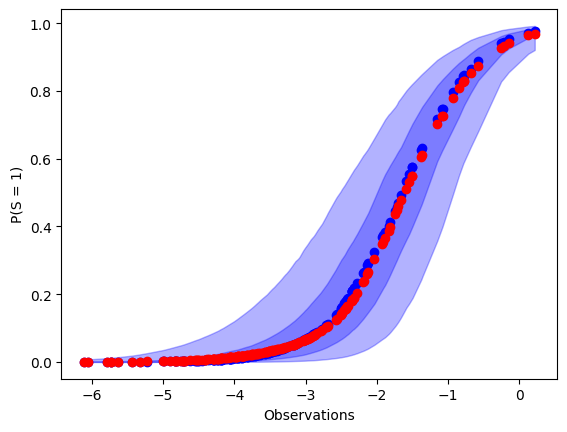

In [60]:
plt.fill_between(
    x, 
    np.quantile(p, q=0.05, axis=1), 
    np.quantile(p, q=0.95, axis=1), 
    alpha=0.3, color="blue")
plt.fill_between(
    x, 
    np.quantile(p, q=0.25, axis=1), 
    np.quantile(p, q=0.75, axis=1), 
    alpha=0.3, color="blue")
plt.scatter(x, np.median(p, axis=1), color="blue")
plt.scatter(x, p_simple, color="red")
plt.xlabel("Observations")
plt.ylabel("P(S = 1)")

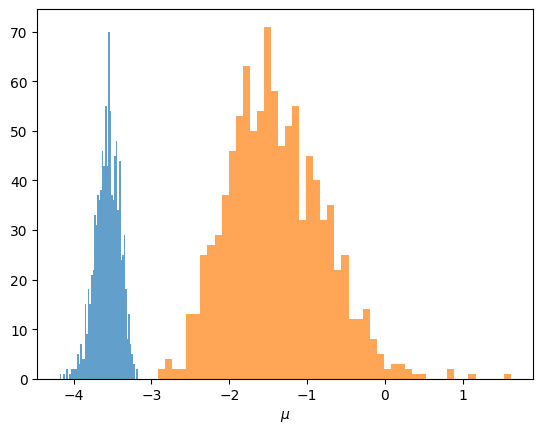

In [61]:
plt.hist(parameter_estimates[0,:,0], alpha=0.7, bins=50)
plt.hist(parameter_estimates[0,:,1], alpha=0.7, bins=50)
f=plt.xlabel(r"$\mu$")